In [81]:
import os
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pylab as plt
import matplotlib.patches as mpatches
import json

In [84]:
emb_dir = "/home/pneekhara/SpeakerEmbeddings"
embeddings = {}
for subdir in os.listdir(emb_dir):
    subdir_path = os.path.join(emb_dir, subdir)
    for file in os.listdir(subdir_path):
        if file.endswith(".npy"):
            with open(os.path.join(subdir_path, file), "rb") as f:
                embedding = np.load(f)
                #subdir_name, fname = file.split("-")
                #subdir_name = subdir_name + " " + fname.split("_")[0]
                if subdir in embeddings:
                    embeddings[subdir].append( embedding )
                else:
                    embeddings[subdir] = [ embedding ]
print (embeddings.keys())

dict_keys(['9017', '11697', '8051', '92', '11614', '6670', '9136', '6097', '6671'])


In [88]:
def mscatter(x,y, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    #ax = ax or plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

def visualize_embeddings(embedding_dict_np, title = "TSNE", max_num_samples_per_spk = 1000):
    # extract num_speakers 10. With new speaker key will have num_speakers+1 speakers in the TSNE plot
    # keys = []
    label_list =[]
    color =[]
    marker_shape = []
    color_idx = 0
    universal_embed_list=[]
    handle_list=[]
    _unique_speakers = {}
    
    marker_list = ['<', '*', 'h', 'X', 's', 'H', 'D', 'd', 'P', 'v', '^', '>', '8', 'p']
    kidx = 0
    
    
    for key in embedding_dict_np:
        speaker = key
        
        _num_samples = len(embedding_dict_np[key])
        if max_num_samples_per_spk is not None:
            _num_samples = min(len(embedding_dict_np[key]), max_num_samples_per_spk)
            
        
        universal_embed_list += embedding_dict_np[key][:_num_samples]
        
        
        print('key:', key, 'length', len(embedding_dict_np[key]))
        
        #id_color = plt.cm.tab20(_unique_speakers[speaker])
        id_color = plt.cm.tab20(kidx)
        color_element = [id_color] * _num_samples
        color += color_element
        _marker_shape = [ "o" ] * _num_samples
        marker_shape += _marker_shape
        _label = key
        handle_list.append(mpatches.Patch(color = id_color, label=_label))
        
        kidx += 1
        
   
    
    speaker_embeddings = TSNE(n_components=2, random_state=0).fit_transform(universal_embed_list)  
    plt.rcParams["figure.figsize"] = (12, 12)
    #fig = plt.figure(figsize=(12, 12))
    #fig.add_subplot(121)
    #ax = plt.axes()
    #ax.set_facecolor("gainsboro")
    #plt.scatter(speaker_embeddings[:, 0], speaker_embeddings[:, 1], marker = marker_shape,  c=color, s=30)
    mscatter(speaker_embeddings[:, 0], speaker_embeddings[:, 1], plt, m = marker_shape,  c=color, s=10)
   
    plt.legend(handles=handle_list,title="Chapter ID")
    plt.title(title)

key: 9017 length 51472
key: 11697 length 1000
key: 8051 length 1000
key: 92 length 1000
key: 11614 length 1000
key: 6670 length 1000
key: 9136 length 1000
key: 6097 length 1000
key: 6671 length 1000


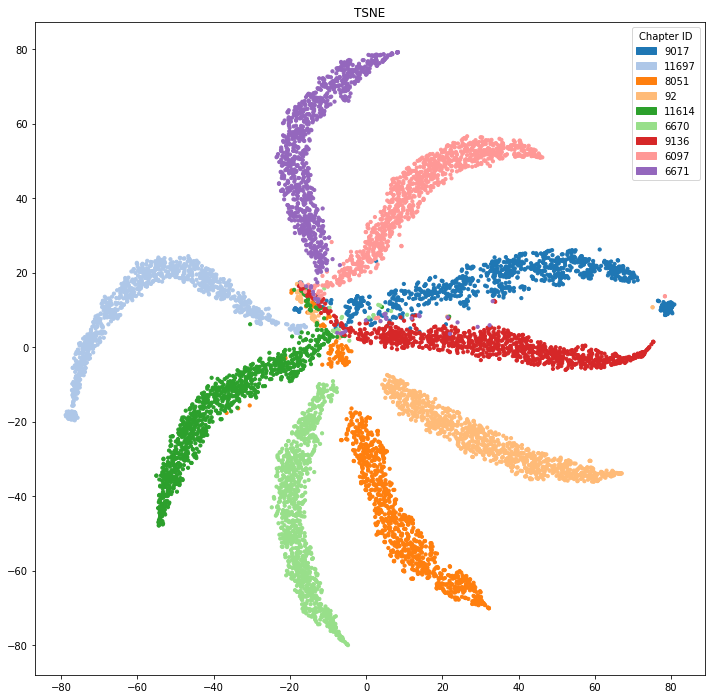

In [89]:
visualize_embeddings(embeddings, max_num_samples_per_spk = 1000)

In [78]:
embeddings.keys()

dict_keys(['14261 dartagnan03part3', '15482 zarathustra', '13130 dartagnan01', '13885 dartagnan03part1', '15752 antoinetteromances4', '11216 celebratedcrimesv1', '13089 historyofforestry'])